<a href="https://colab.research.google.com/github/akhileshmanukonda/Air-quality-project-/blob/main/Data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
!pip install keras
!pip install tensorflow


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from pandas import DatetimeIndex

In [162]:
# Load the dataset
df = pd.read_csv('AP001.csv')
df.head()




,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,...,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,...,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,...,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


In [163]:
# Extract the day from 'From' column
df['From Date'] = pd.to_datetime(df['From Date'])
df['Day'] = df['From Date'].dt.date



In [164]:
# Extract the day from 'From' column
df['From Date'] = pd.to_datetime(df['From Date'])
df['Day'] = df['From Date'].dt.date

# Group by 'Day' and calculate the mean of numeric columns only
# Select only numeric columns before applying the aggregation
numeric_columns = df.select_dtypes(include=np.number).columns
daily_report = df.groupby('Day')[numeric_columns].agg('mean').reset_index()

# Display the daily report
print(daily_report)



             Day  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0     2016-07-01      12.236667     50.791667   14.444167    38.509167   
1     2016-07-02      22.278000     67.738667   26.850667    46.828667   
2     2016-07-03      14.162500     46.146250   12.116250    41.458750   
3     2016-07-04       5.842105     24.153684    7.357895    39.178947   
4     2016-07-05       4.718750     17.228750   15.559167    39.981667   
...          ...            ...           ...         ...          ...   
2460  2023-03-27      37.593750     61.177083   11.168333    38.981667   
2461  2023-03-28      40.843750     59.895833    7.777917    38.923333   
2462  2023-03-29      40.130435     61.641304    4.961250    32.171250   
2463  2023-03-30      49.364583     72.395833    5.115833    31.208333   
2464  2023-03-31      39.739583     60.291667    6.989167    35.660000   

      NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0     29.557500     7.744167     6

In [204]:
daily_report.fillna(method='ffill', inplace=True)



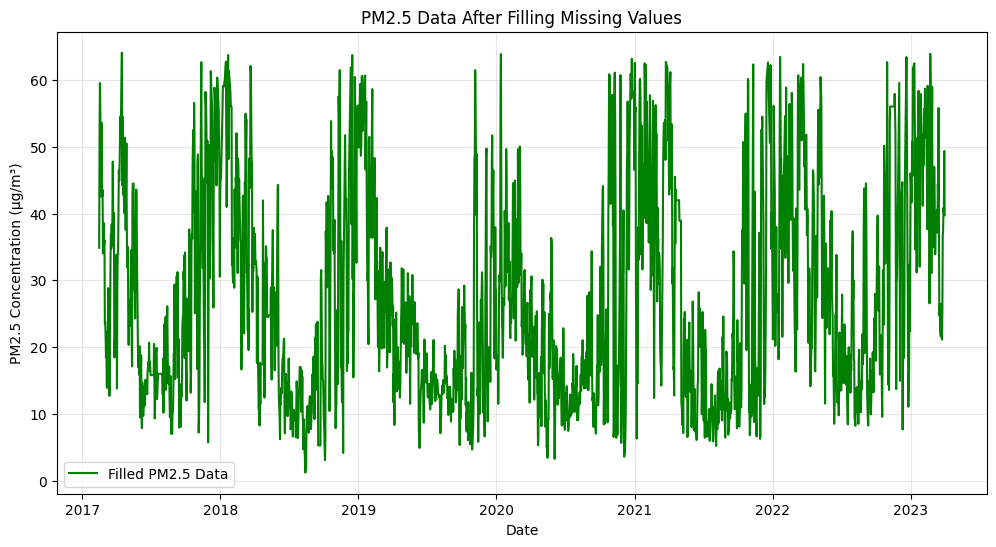

In [208]:
filled_data = daily_report['PM2.5 (ug/m3)'].interpolate()  # Replace with your method
plt.figure(figsize=(12, 6))
plt.plot(daily_report['Day'], filled_data, label='Filled PM2.5 Data', color='green')
plt.title('PM2.5 Data After Filling Missing Values')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [166]:
#remove  outliers
daily_report = daily_report[daily_report['PM2.5 (ug/m3)'] < daily_report\
 ['PM2.5 (ug/m3)'].quantile(0.95)]


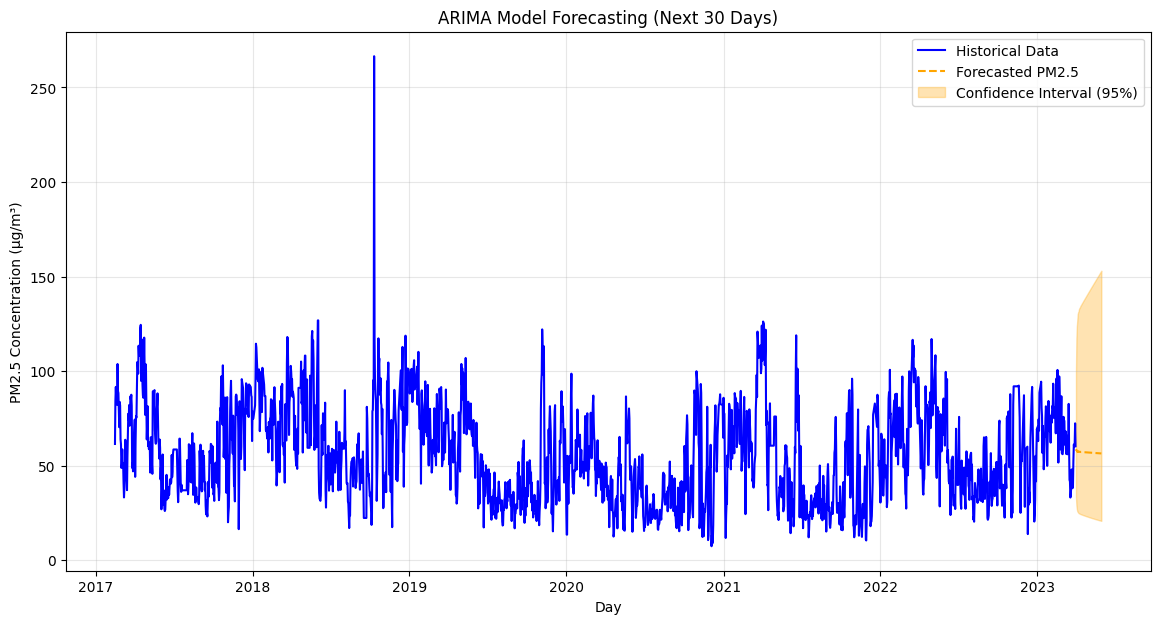

In [202]:
plt.figure(figsize=(14, 7))
plt.plot(daily_report['Day'], np.exp(daily_report['daily_report_log']), label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted PM2.5', color='orange', linestyle='--')
plt.fill_between(
    forecast_index,
    forecast_ci_lower,
    forecast_ci_upper,
    color='orange',
    alpha=0.3,
    label='Confidence Interval (95%)'
)
plt.title('ARIMA Model Forecasting (Next 30 Days)')
plt.xlabel('Day')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


independent feature ki

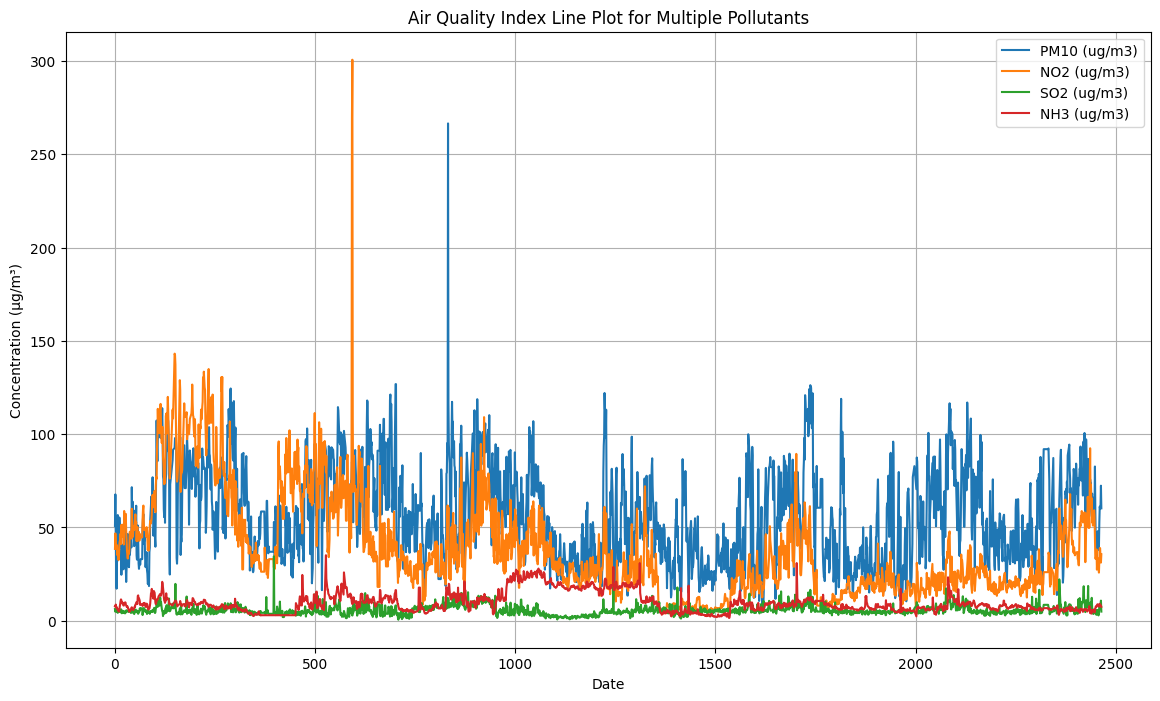

In [169]:
plt.figure(figsize=(14, 8))
for pollutant in ['PM10 (ug/m3)', 'NO2 (ug/m3)', 'SO2 (ug/m3)', 'NH3 (ug/m3)']:
    plt.plot(daily_report.index, daily_report[pollutant], label=pollutant)

plt.title('Air Quality Index Line Plot for Multiple Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


# **preprocessing for Lstm model**

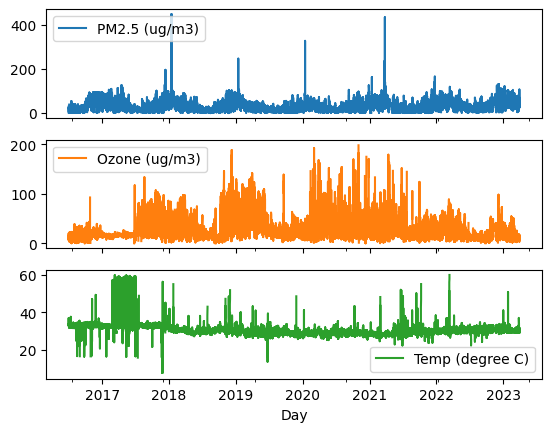

In [170]:
plot_pol= ['PM2.5 (ug/m3)','Ozone (ug/m3)', 'Temp (degree C)']
plot_features = df[plot_pol]
plot_features.index = df['Day']
_ = plot_features.plot(subplots=True)

In [171]:
daily_report.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5 (ug/m3),2341.0,26.957584,15.699914,1.175000,13.958333,22.384444,38.690000,64.090909
PM10 (ug/m3),2341.0,55.653623,24.728671,7.420455,35.385417,52.447917,74.541667,266.491579
NO (ug/m3),2341.0,12.770682,9.162888,0.952917,5.729583,10.709231,17.819167,56.955417
NO2 (ug/m3),2341.0,37.832159,26.799662,3.874167,19.634583,30.433333,49.257917,300.621667
NOx (ppb),2341.0,30.176270,19.220375,0.000000,17.061667,25.267917,39.186250,186.872083
NH3 (ug/m3),2341.0,9.719260,5.427160,1.498750,6.085417,8.257391,11.582857,35.137917
SO2 (ug/m3),2341.0,5.642832,2.501668,0.586667,4.193750,5.138636,6.683750,34.598000
CO (mg/m3),2341.0,0.641906,0.394743,0.000000,0.396667,0.657500,0.838750,5.437500
Ozone (ug/m3),2341.0,27.947603,15.533874,1.634167,16.985417,23.266250,34.840417,101.444583
Benzene (ug/m3),2341.0,0.759664,0.555165,0.000000,0.380000,0.629167,1.035417,5.892500


In [212]:
# Select features (multivariate input)
features = ['PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)', 'CO (mg/m3)']
target = 'PM2.5 (ug/m3)'


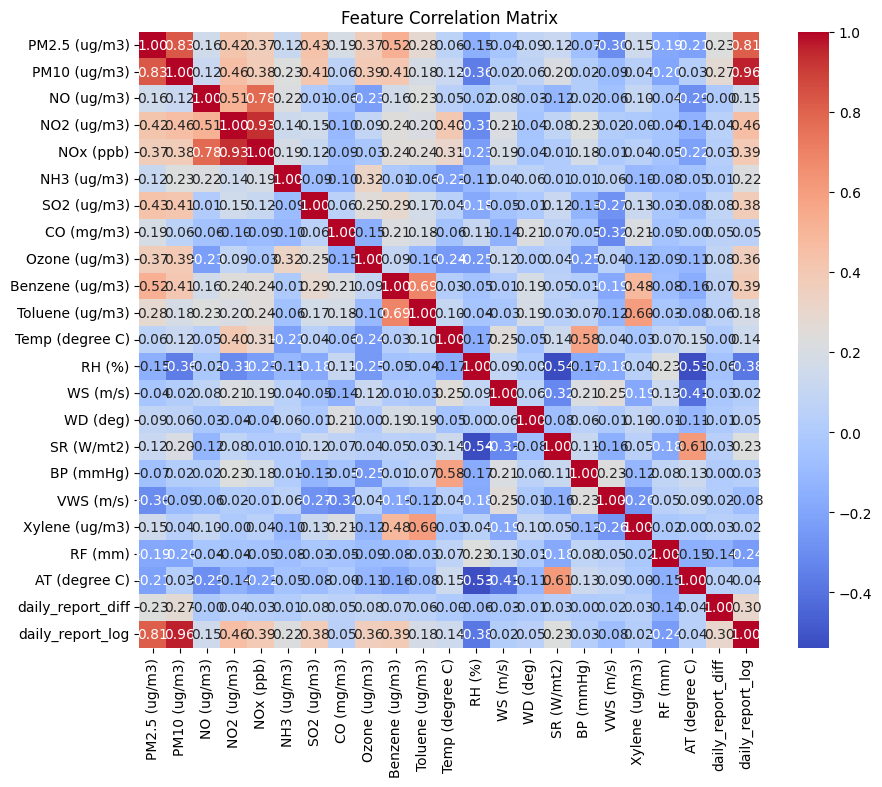

In [216]:
plt.figure(figsize=(10, 8))
sns.heatmap(daily_report.drop('Day', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Drop the 'Day' column
plt.title('Feature Correlation Matrix')
plt.show()

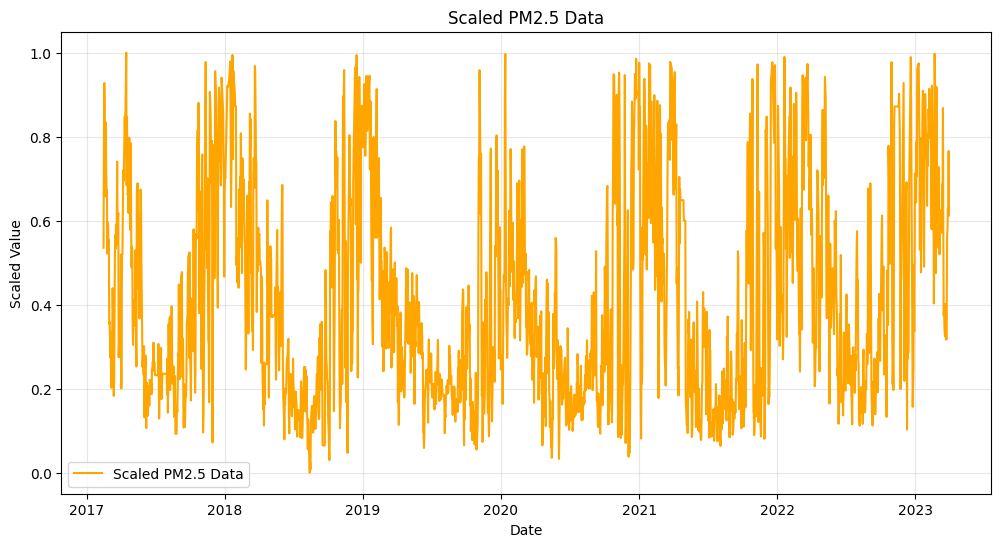

In [213]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_report[features].values.reshape(-1,1))

scaled_data = scaler.fit_transform(daily_report[['PM2.5 (ug/m3)']])  # Scaling the PM2.5 column
plt.figure(figsize=(12, 6))
plt.plot(daily_report['Day'], scaled_data, label='Scaled PM2.5 Data', color='orange')
plt.title('Scaled PM2.5 Data')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


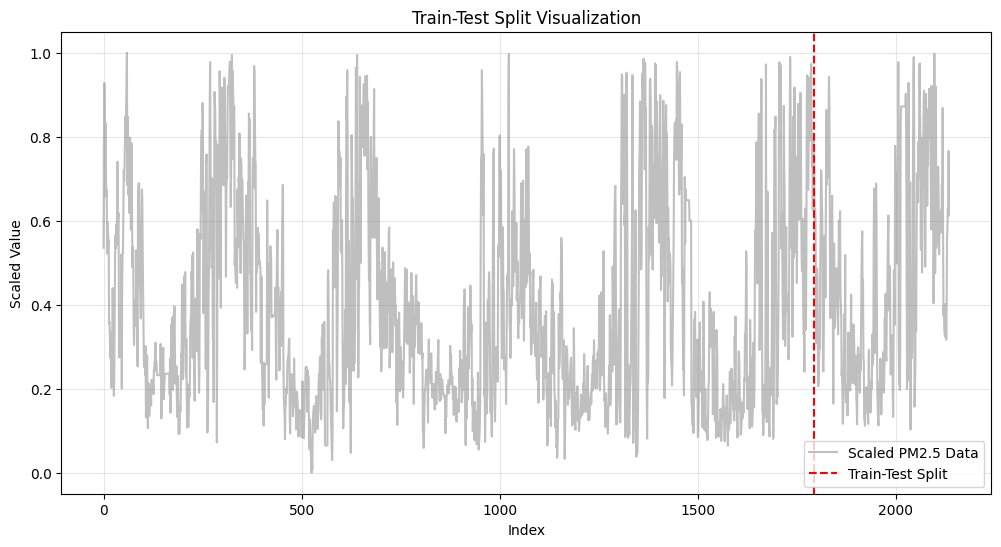

In [214]:
# Create the time series data structure
look_back = 60
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]
plt.figure(figsize=(12, 6))
plt.plot(range(len(scaled_data)), scaled_data, label='Scaled PM2.5 Data', color='gray', alpha=0.5)
plt.axvline(split_index, color='red', linestyle='--', label='Train-Test Split')
plt.title('Train-Test Split Visualization')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
train_generator = TimeseriesGenerator(train_data, train_data,
                                     length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=look_back, batch_size=1)

In [175]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
                    input_shape=(look_back, 1)))
lstm_model.add(LSTM(units=100,return_sequences = True))
lstm_model.add(LSTM(units=100))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(train_generator, epochs=5)

Epoch 1/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - loss: 0.0067
Epoch 2/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 54s 97ms/step - loss: 0.0054
Epoch 3/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 56s 100ms/step - loss: 0.0028
Epoch 4/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - loss: 0.0015
Epoch 5/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 54s 97ms/step - loss: 0.0013


In [176]:
lstm_predictions = lstm_model.predict(test_generator)

2810/2810 ━━━━━━━━━━━━━━━━━━━━ 67s 23ms/step


In [177]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(test_data[look_back:])

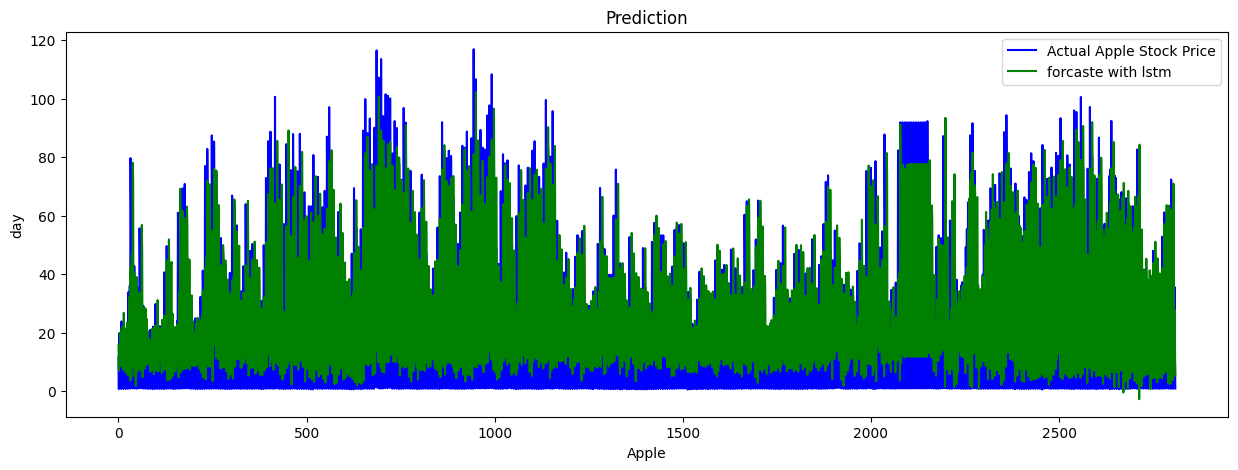

In [178]:
# Plot the data
plt.figure(figsize=(15,5))
plt.plot(actual_prices, color='blue', label='Actual Apple Stock Price')
plt.plot(lstm_predictions, color='green', label='forcaste with lstm')
plt.title('Prediction')
plt.xlabel('Apple')
plt.ylabel('day')
plt.legend()
plt.show()

In [179]:
def predict_future_days(model, base_data, days_to_predict, scaler, look_back=2000):
    # Start with the last days of the base data
    input_data = base_data[-look_back:].reshape(1, look_back, 1)

    # Predict future days
    future_predictions = []

    for _ in range(days_to_predict):
        # Make a prediction
        prediction = model.predict(input_data)

        # Append the prediction
        future_predictions.append(prediction[0, 0])

        # Update the input data to include the prediction and exclude the oldest data point
        # Correctly reshape the prediction to (1, 1, 1) before appending
        input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Invert the scaling
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions



In [180]:
# Predict next 30 days
days_to_predict = 30
future_days = predict_future_days(lstm_model, scaled_data, days_to_predict, scaler, look_back)

# Print and plot the predictions for the next 5 days
#print("Future predictions:", future_days)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

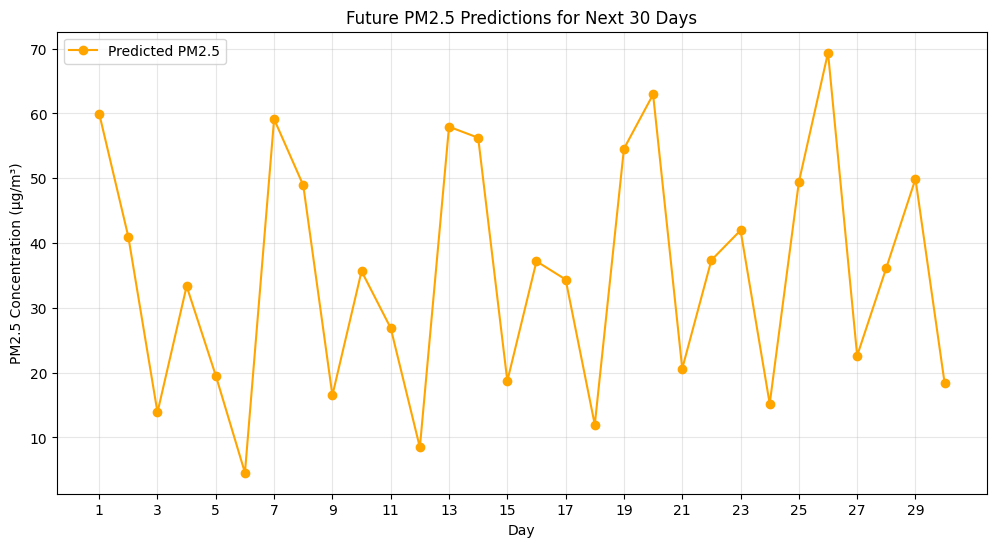

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, days_to_predict + 1), future_days, marker='o', color='orange', label='Predicted PM2.5')
plt.title('Future PM2.5 Predictions for Next 30 Days')
plt.xlabel('Day')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(np.arange(1, days_to_predict + 1, step=2))  # Adjust x-ticks for better visibility
plt.grid(alpha=0.3)
plt.legend()
plt.show()


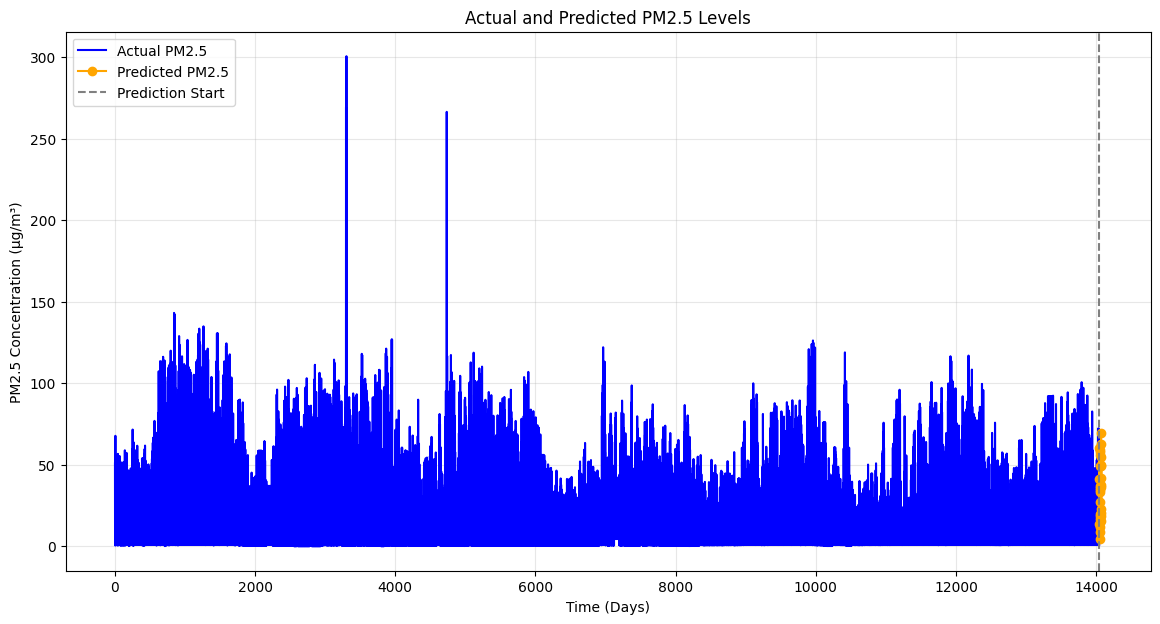

In [182]:
# Combine actual data and future predictions
# target_idx should be 0 since scaled_data only has one column after inverse_transform
target_idx = 0
aligned_actual = scaler.inverse_transform(scaled_data)[:, target_idx]  # Actual PM2.5 values
combined_data = np.concatenate([aligned_actual, future_days.flatten()])

# Plot actual and predicted values
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(
    np.arange(len(aligned_actual)),
    aligned_actual,
    label='Actual PM2.5',
    color='blue'
)

# Plot future predictions
plt.plot(
    np.arange(len(aligned_actual), len(combined_data)),
    future_days,
    marker='o',
    color='orange',
    label='Predicted PM2.5'
)

# Formatting the plot
plt.axvline(len(aligned_actual) - 1, color='gray', linestyle='--', label='Prediction Start')
plt.title('Actual and Predicted PM2.5 Levels')
plt.xlabel('Time (Days)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [183]:
!pip install pmdarima
import pmdarima as pm

In [184]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Example dataset
# Replace 'date_column', 'target', and 'exogenous_features' with your actual column names
date_column = 'Day'
target = 'PM2.5 (ug/m3)'
exogenous_features = ['NO2 (ug/m3)', 'SO2 (ug/m3)']

# Ensure no missing values (optional)
data = daily_report.dropna()

# Target and exogenous variables
y = daily_report[target]
X_exog = daily_report[exogenous_features]

# Train-test split
train_size = int(len(daily_report) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X_exog[:train_size], X_exog[train_size:]

# Check for stationarity (optional)
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(y)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
if adf_result[1] > 0.05:
    print("Data is non-stationary. Differencing will be applied in the ARIMA model.")


ADF Statistic: -4.10512644118695
p-value: 0.0009497989451354181


In [185]:
#adfuller test to generate the critical values
result = adfuller(daily_report['PM2.5 (ug/m3)'], autolag='AIC')

# Extract and print the test results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key, value))

ADF Statistic: -4.10512644118695
p-value: 0.0009497989451354181
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [186]:
#log and differencing the data to become data non-stayionary to stationary
daily_report_log = np.log(daily_report['PM2.5 (ug/m3)'])
daily_report_diff = daily_report_log.diff() # Use daily_report_log directly
daily_report.dropna(inplace=True)

In [187]:
#log and differencing the data to become data non-stayionary to stationary
daily_report_log = np.log(daily_report['PM10 (ug/m3)'])
daily_report_diff = daily_report_log.diff() # Use daily_report_log directly
# Add the differenced data as a column to the DataFrame
daily_report['daily_report_diff'] = daily_report_diff  # Assign the differenced series to a new column
daily_report.dropna(inplace=True)
daily_report.head()

,Day,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C),daily_report_diff
229,2017-02-15,34.871250,61.479167,15.979583,92.665417,62.241667,8.746522,4.559565,0.852083,15.347917,...,72.312083,2.226250,274.256667,110.618750,925.25,-0.058750,0.121250,0.0,19.269583,0.172008
230,2017-02-16,51.937500,84.385417,14.427917,100.798750,65.312083,9.378696,5.423478,1.272083,15.303333,...,70.499583,1.864583,264.923333,117.927083,925.25,-0.072917,0.189583,0.0,18.968333,0.316696
231,2017-02-17,59.555417,91.642500,17.835417,110.160000,73.050000,9.095217,4.679565,0.927083,14.919167,...,68.572500,1.575417,255.010417,118.291667,925.25,-0.089583,0.260417,0.0,18.979583,0.082501
232,2017-02-18,55.712083,84.687083,18.991250,117.321250,77.815833,8.846957,5.114348,0.894583,15.068750,...,58.145833,1.652500,251.552083,124.506667,925.25,-0.073750,0.457083,0.0,20.278750,-0.078932
234,2017-02-20,42.562500,82.197917,20.785833,134.899583,88.630833,7.466087,6.786087,0.980833,15.394167,...,44.687500,1.099583,249.708333,121.718750,925.25,-0.002500,0.615000,0.0,23.648333,-0.029833


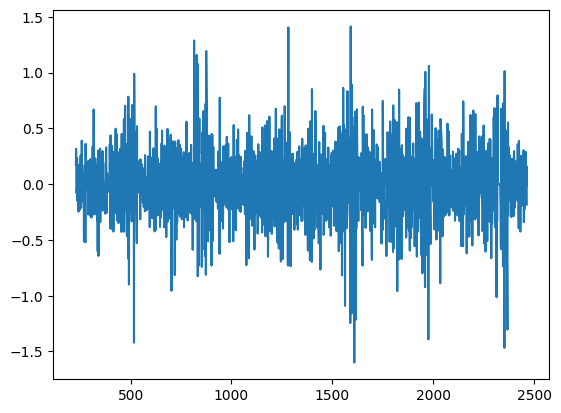

In [188]:
plt.plot(daily_report.index,daily_report['daily_report_diff'])
plt.show()

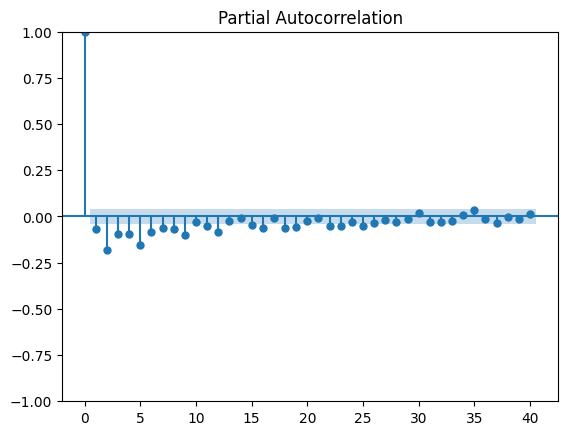

In [189]:
plot_pacf(daily_report['daily_report_diff'], lags = 40)
plt.show()

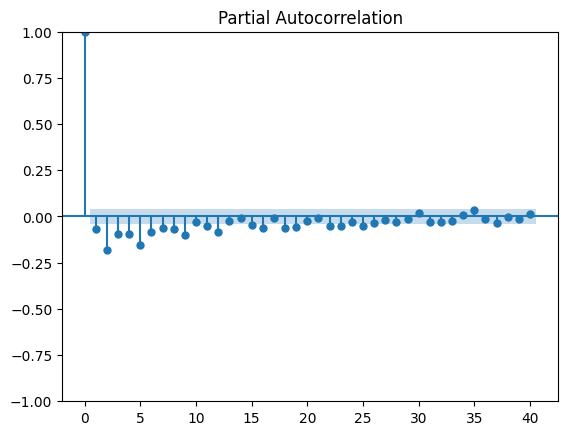

In [190]:
plot_pacf(daily_report['daily_report_diff'], lags = 40)
plt.show()

In [191]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

def find_best_aic_model(data, max_p, max_d, max_q):
    """
    Finds ARIMA model with lowest AIC using loop.
    """
    best_aic = np.inf
    best_model = None
    best_order = None
    for p, d, q in product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
        try:
            model = SARIMAX(data, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model_fit
                best_order = (p, d, q)
        except Exception as e:
            continue  # Ignoring errors during fitting the model
    return best_order, best_aic

# Set the maximum values for p, d,and q
max_p = 8
max_d = 1
max_q = 8

# Add the 'daily_report_log' as a column to the DataFrame
daily_report['daily_report_log'] = np.log(daily_report['PM10 (ug/m3)']) #Adding the log transformed data as a column

# Running the grid search on the log data
best_order, best_aic = find_best_aic_model(daily_report['daily_report_log'], max_p, max_d, max_q) # Now using the column in the DataFrame
best_order, best_aic

((4, 1, 3), 545.409120524677)

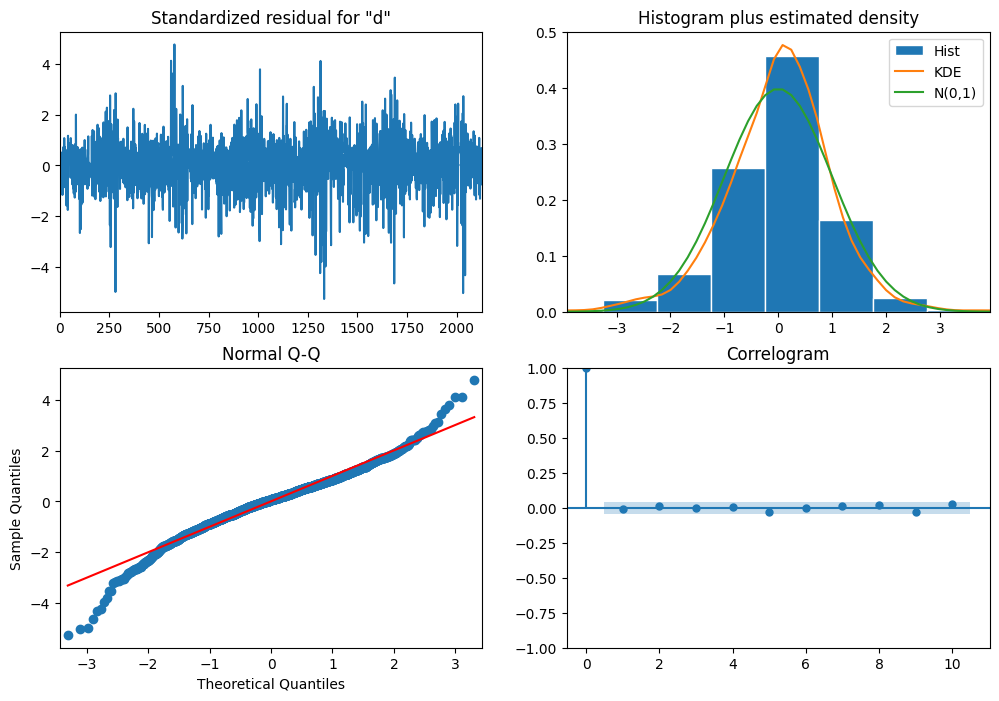

In [192]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting the selected ARIMA(5, 0, 3) model to the log-transformed data
selected_model = SARIMAX(daily_report['daily_report_log'], order=(5, 0, 3), enforce_stationarity=False, enforce_invertibility=False)
selected_model_fit = selected_model.fit(disp=False)

# Displaying the model summary
selected_model_fit.summary()

# Plotting the diagnostics for the selected model
selected_model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [193]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have already trained your SARIMAX model and have 'selected_model_fit'

# Number of days to forecast
forecast_days = 60

# Get the last 'forecast_days' data points as the test data
test_data = daily_report['PM2.5 (ug/m3)'][-forecast_days:]

# Forecasting the next 30 days
forecast = selected_model_fit.get_forecast(steps=forecast_days)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Ensure log transformation was used
forecast_values = np.exp(forecast_mean)  # Assuming you used log transformation
forecast_ci_lower = np.exp(forecast_ci.iloc[:, 0])
forecast_ci_upper = np.exp(forecast_ci.iloc[:, 1])



In [194]:
# Calculate accuracy metrics
mse = mean_squared_error(test_data, forecast_values)
mae = mean_absolute_error(test_data, forecast_values)
r2 = r2_score(test_data, forecast_values)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 344.47904453234355
Mean Absolute Error (MAE): 15.637183123615248
R-squared (R2): -1.948044522586346


In [195]:
# Prepare the forecasted period index
# Get the last date in daily_report['Day']
last_date = daily_report['Day'].iloc[-1]
# Add 1 day to the last date using Timedelta
start_date = pd.to_datetime(last_date) + pd.Timedelta(days=1)
forecast_index = pd.date_range(start=start_date, periods=forecast_days, freq='D')

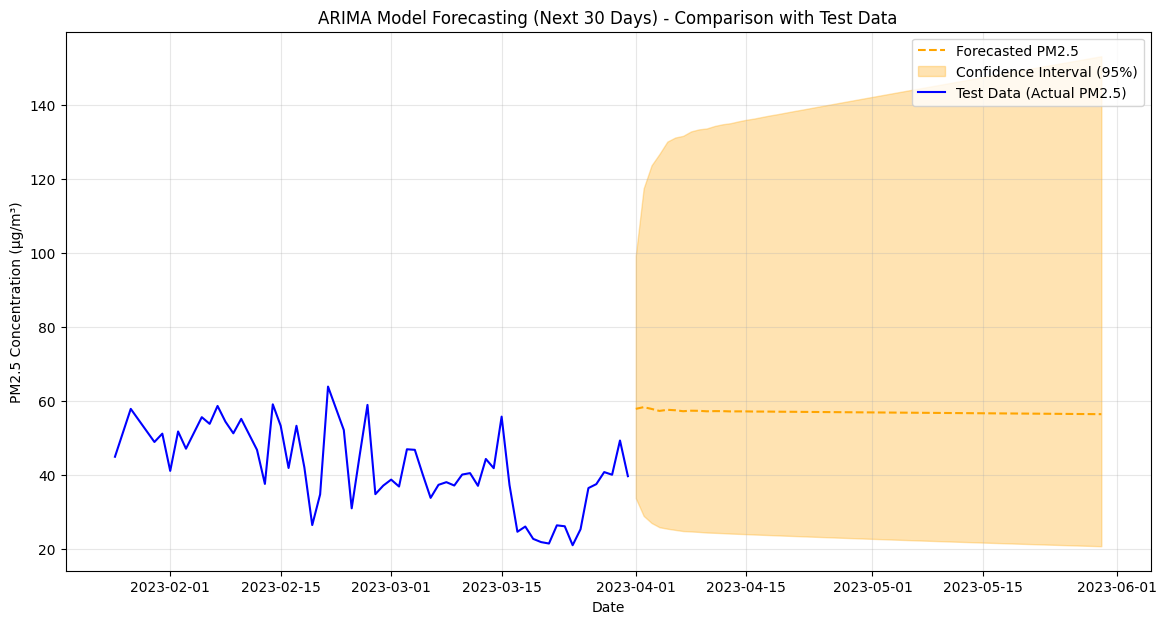

In [201]:
# Plotting the forecast with confidence intervals and test data
plt.figure(figsize=(14, 7))

# Plot forecasted values
plt.plot(forecast_index, forecast_values, label='Forecasted PM2.5', color='orange', linestyle='--')

# Confidence intervals
plt.fill_between(
    forecast_index,
    forecast_ci_lower,
    forecast_ci_upper,
    color='orange',
    alpha=0.3,
    label='Confidence Interval (95%)'
)
# Plot test data
plt.plot(daily_report['Day'][-forecast_days:], test_data, label='Test Data (Actual PM2.5)', color='blue')

# Formatting the plot
plt.title('ARIMA Model Forecasting (Next 30 Days) - Comparison with Test Data')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [220]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example dataset (daily pollutant concentration)
# Replace 'daily_report' with your dataset
features = ['PM10 (ug/m3)', 'NO2 (ug/m3)', 'SO2 (ug/m3)']
target = 'PM2.5 (ug/m3)'  # Example target variable

# Prepare the data
X = daily_report[features].values
y = daily_report[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a Gaussian Process kernel (RBF + Constant)
kernel = Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1)


# Create Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=1e-2)






In [222]:
# Fit the model
gpr.fit(X_train, y_train)

# Predictions
y_pred, sigma = gpr.predict(X_test, return_std=True)

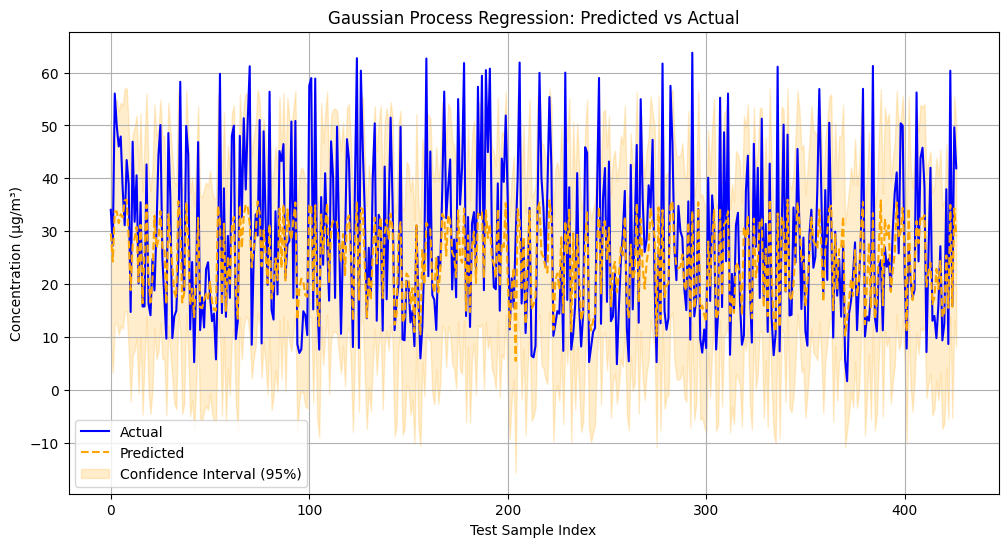

In [223]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
plt.fill_between(
    np.arange(len(y_pred)),
    y_pred - 2 * sigma,
    y_pred + 2 * sigma,
    color='orange',
    alpha=0.2,
    label='Confidence Interval (95%)'
)
plt.title('Gaussian Process Regression: Predicted vs Actual')
plt.xlabel('Test Sample Index')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 274.3113227390884
Mean Absolute Error (MAE): 13.960374075085976
R-squared (R2): -0.5562404351190327


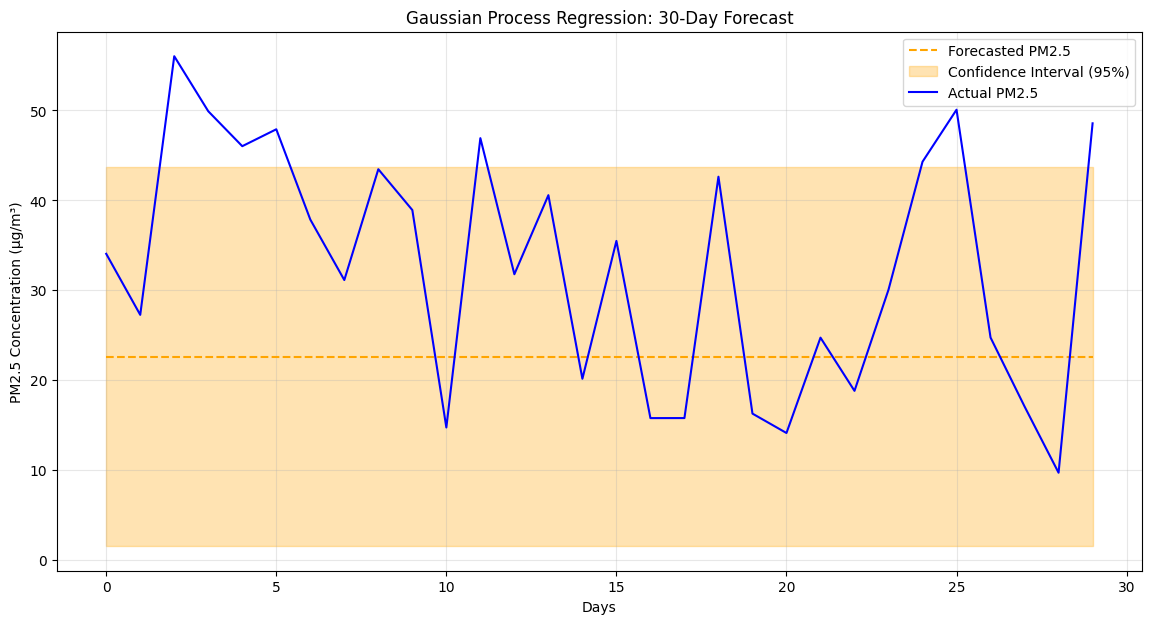

In [224]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Forecast the next 30 days based on the average of the last few days of features
forecast_days = 30
last_features = np.mean(X_train[-30:], axis=0).reshape(1, -1)

# Repeat the last_features for 30 days to create a forecast dataset
forecast_features = np.tile(last_features, (forecast_days, 1))

# Predict using the trained Gaussian Process Regressor
forecast_values, forecast_sigma = gpr.predict(forecast_features, return_std=True)

# Accuracy metrics (if you have actual values for comparison)
if len(y_test) >= forecast_days:
    actual_values = y_test[:forecast_days]
    mse = mean_squared_error(actual_values, forecast_values)
    mae = mean_absolute_error(actual_values, forecast_values)
    r2 = r2_score(actual_values, forecast_values)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")
else:
    print("Not enough actual values to calculate accuracy metrics for the forecast period.")

# Plotting the 30-day forecast
plt.figure(figsize=(14, 7))
plt.plot(range(forecast_days), forecast_values, label='Forecasted PM2.5', color='orange', linestyle='--')
plt.fill_between(
    range(forecast_days),
    forecast_values - 2 * forecast_sigma,
    forecast_values + 2 * forecast_sigma,
    color='orange',
    alpha=0.3,
    label='Confidence Interval (95%)'
)

# If actual values are available, plot them
if len(y_test) >= forecast_days:
    plt.plot(range(forecast_days), actual_values, label='Actual PM2.5', color='blue')

# Formatting the plot
plt.title('Gaussian Process Regression: 30-Day Forecast')
plt.xlabel('Days')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
